# HW2 Task 2

# Pritam Biswas (pb2796)

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
warnings.filterwarnings('ignore')

# Task 2

# 2.1

In [3]:
house_df=pd.read_csv("data.csv")

In [4]:
house_df=house_df.drop('date', axis=1)

In [5]:
print(house_df.country.unique())

['USA']


In [6]:
print(len(house_df.street.unique()))

4525


In [7]:
print(len(house_df))

4600


In [8]:
house_df=house_df.drop('country', axis=1)
house_df=house_df.drop('street', axis=1)

We are dropping country as there is only 1 country, and also dropping street as there is a very large no. of possible values for streets.(comparable to the no. of rows in data)

In [9]:
house_df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
statezip          object
dtype: object

In [10]:
house_df=house_df[house_df.price>0]

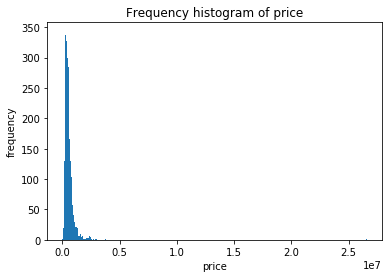

In [11]:
plt.hist(house_df["price"], bins="auto")
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Frequency histogram of price')
plt.show()

Using the data dictionary on each type of features, we select categorical features as the ones which have a fixed set of unique values.

Continuous variables: sqft_living, sqft_lot, sqft_above, sqft_basement

Categorical variables: country, statezip, city, view, waterfront, condition.
    

In [12]:
cat_feature=['waterfront', 'statezip','city','condition', 'view']
num_feature=['yr_renovated','yr_built','sqft_basement','sqft_above','floors','sqft_lot','sqft_living','bathrooms','bedrooms']

Going forward in this question we will use waterfront, condition and view also as continuous variables as these are ordinal type variables so it would help in the regression

# 2.2

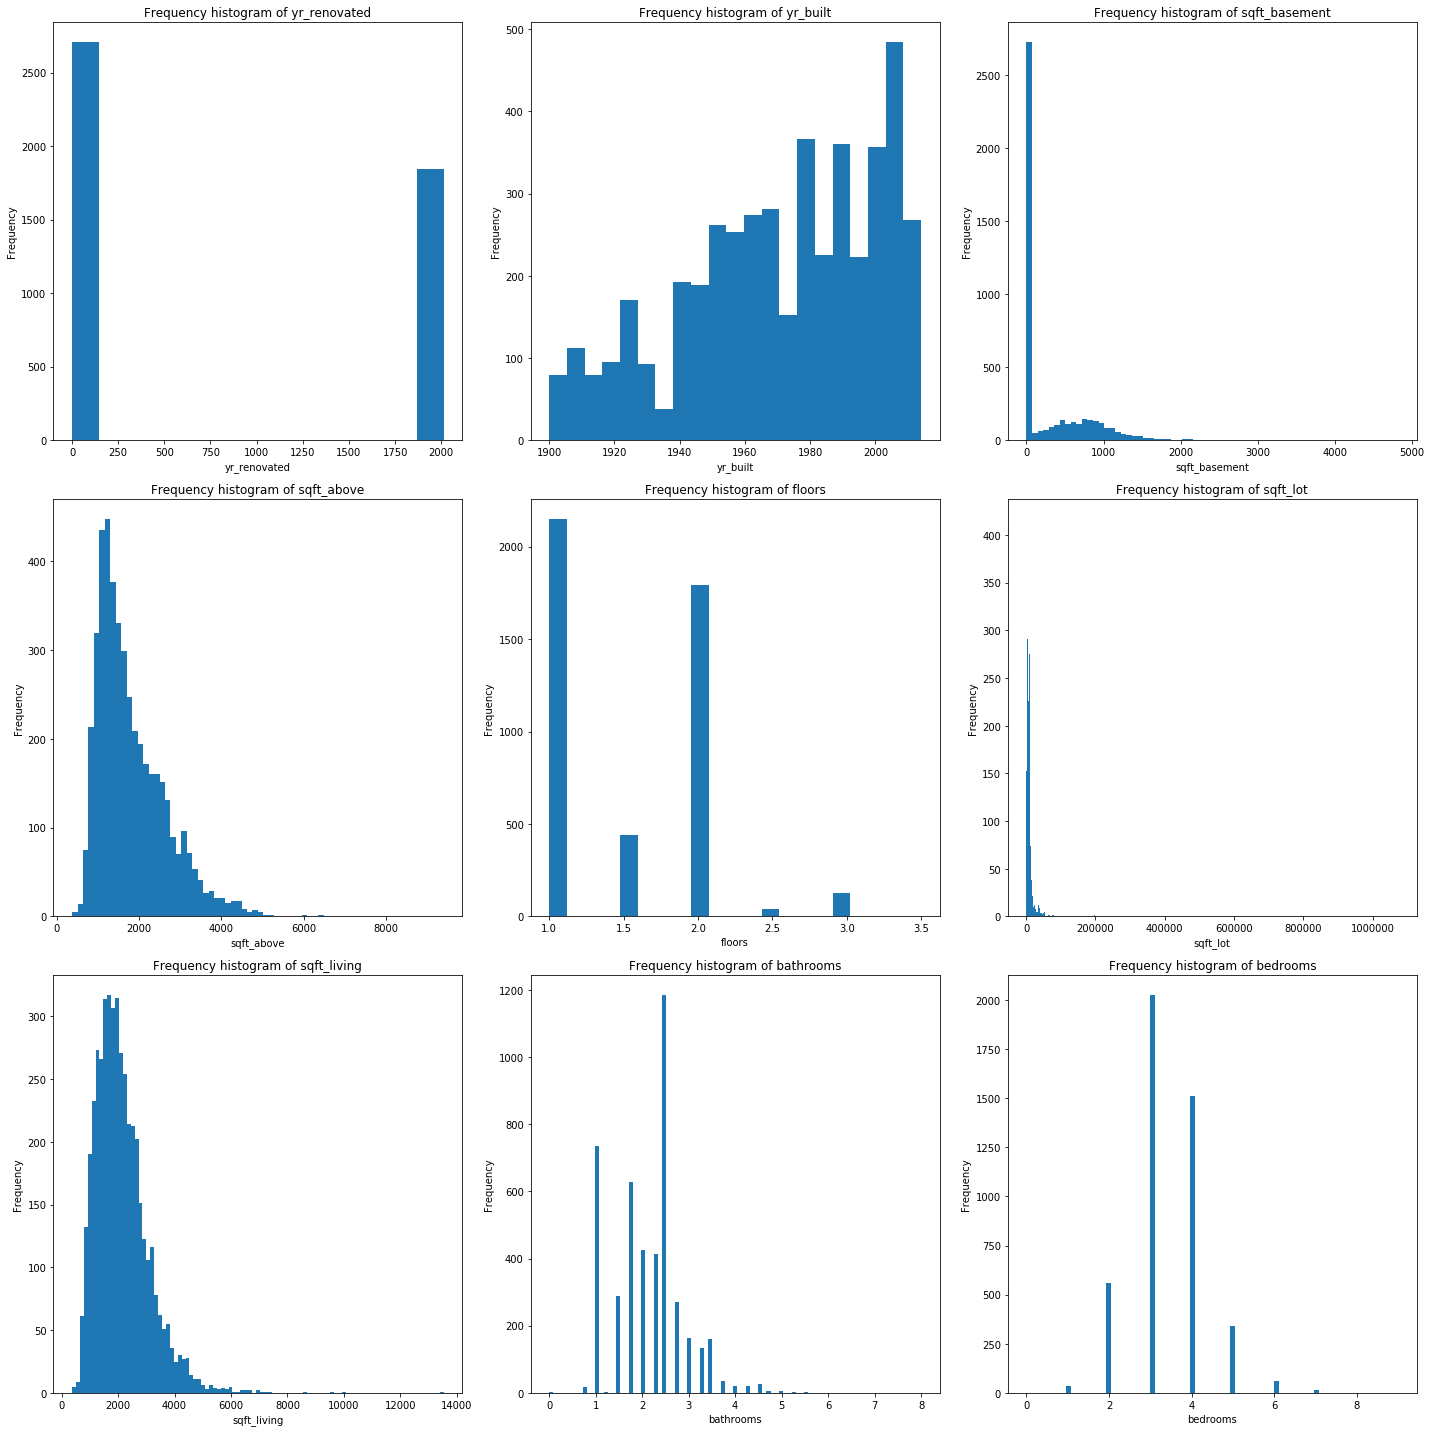

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
x=0
y=0

for feature in num_feature:
    ax[x,y].hist(house_df[feature], bins="auto")
    ax[x,y].set_xlabel(feature)
    ax[x,y].set_ylabel('Frequency')
    ax[x,y].set_title("Frequency histogram of "+feature)
    if y==2:
        x+=1
        y=0
        continue
    else:
        y+=1

plt.tight_layout()
plt.show()


    

The features yr_renovated and sqft_basement have very high frequency of 0 , which is actually NAN. So these two features may require special treatment.

We could impute the missing values in these two features.

# 2.3

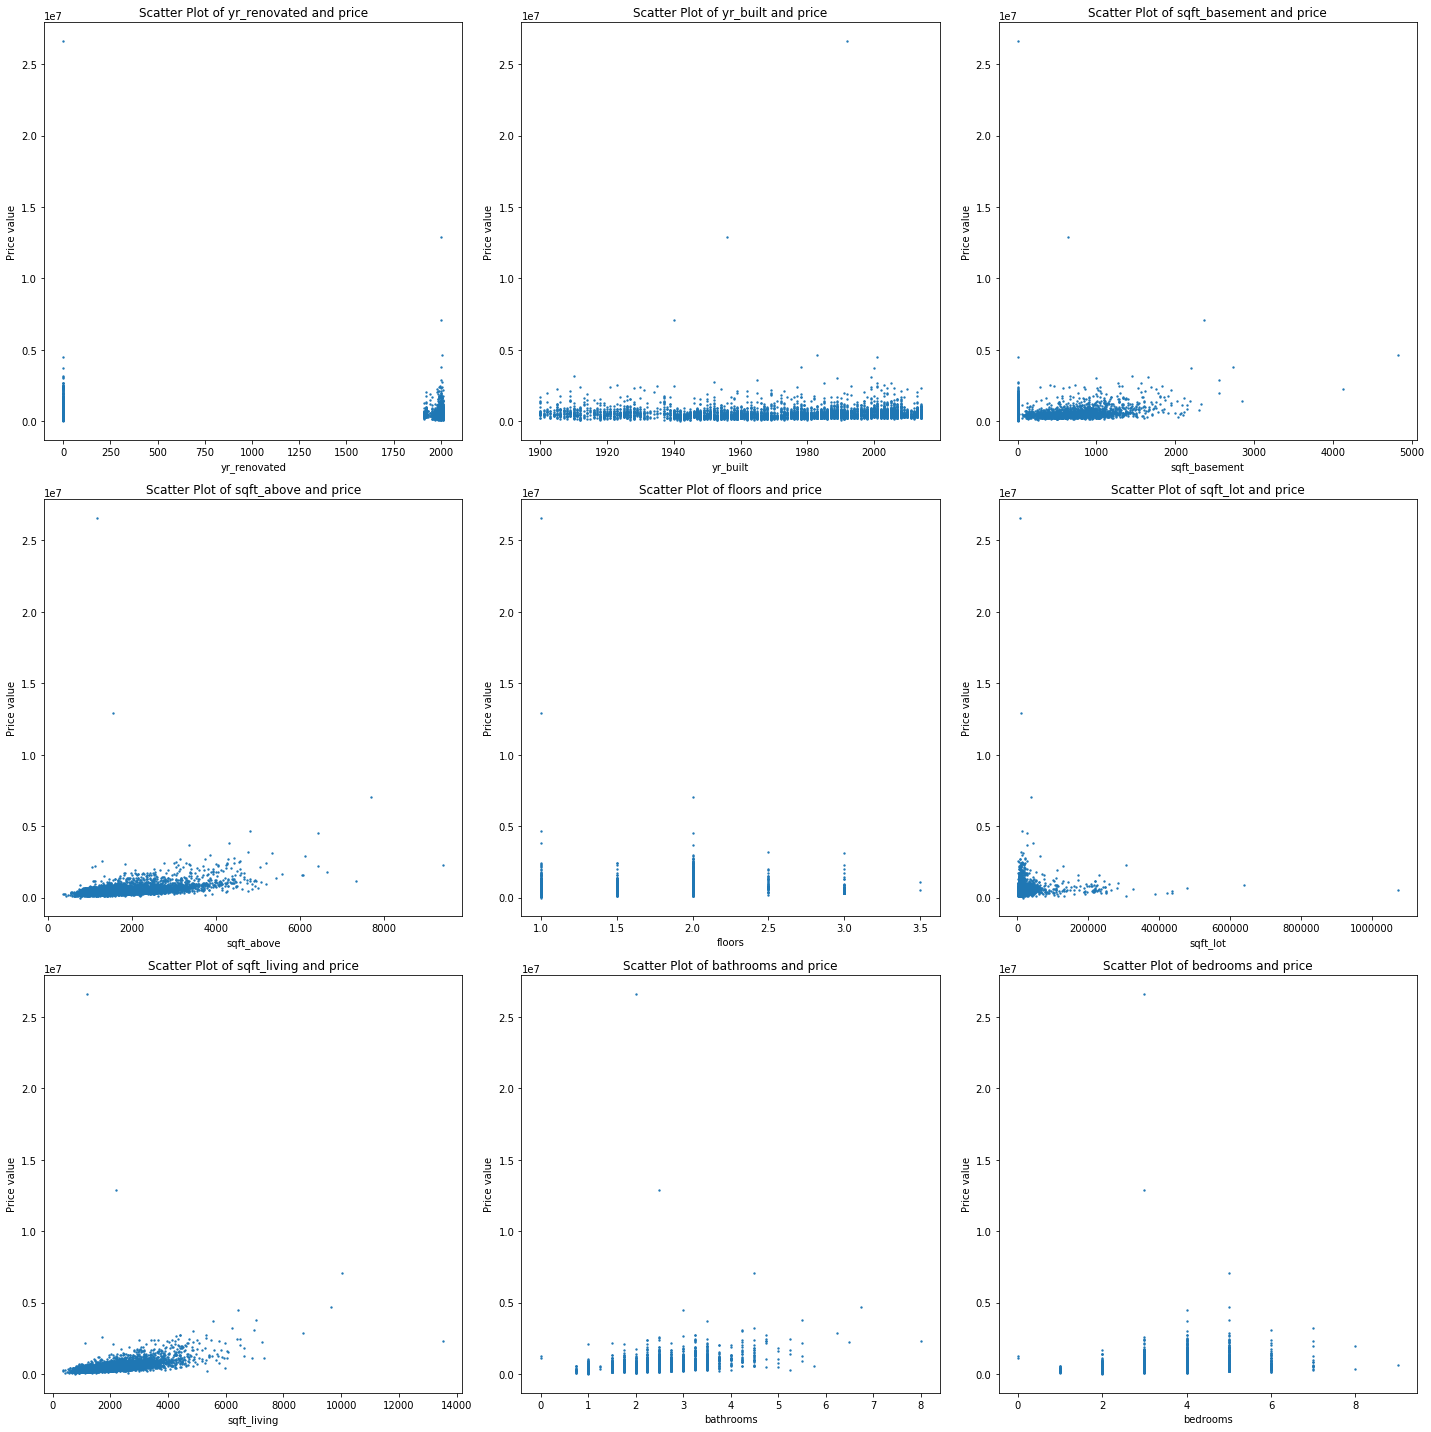

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
x=0
y=0

for feature in num_feature:
    ax[x,y].scatter(house_df[feature], house_df['price'],s=2, alpha=0.9)
    ax[x,y].set_xlabel(feature)
    ax[x,y].set_ylabel('Price value')
    ax[x,y].set_title("Scatter Plot of "+feature+' and price')
    if y==2:
        x+=1
        y=0
        continue
    else:
        y+=1

plt.tight_layout()
plt.show()

# 2.4

In [15]:
label=house_df['price']
house_df=house_df.drop('price', axis=1)

In [16]:
house_df['yr_renovated'].replace(0,np.nan, inplace=True)
house_df['sqft_basement'].replace(0,np.nan, inplace=True)

In [17]:
X_trainv,X_test,y_trainv,y_test=train_test_split(house_df,label, test_size=0.25, random_state=55)

In [18]:
numeric_preprocessor=make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'),StandardScaler())
numeric_preprocessor_us=make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'))

cat_preprocessor=make_pipeline(SimpleImputer(strategy='constant', fill_value="NONE"), OneHotEncoder(handle_unknown='ignore'))

In [19]:
cat_feature=['statezip','city']
num_feature=['yr_renovated','yr_built','sqft_basement','sqft_above','floors','sqft_lot','sqft_living','bathrooms','bedrooms', 'waterfront', 'view', 'condition']


preprocessor2 = ColumnTransformer(transformers=[
        ('num', numeric_preprocessor, num_feature),
        ('cat', cat_preprocessor, cat_feature)])

preprocessor2_us = ColumnTransformer(transformers=[
        ('num', numeric_preprocessor_us, num_feature),
        ('cat', cat_preprocessor, cat_feature)])


In [20]:
sc=cross_val_score(make_pipeline(preprocessor2_us, LinearRegression()), X_trainv, y_trainv,cv=5)
print(np.mean(sc))
sc2=cross_val_score(make_pipeline(preprocessor2, LinearRegression()), X_trainv, y_trainv,cv=5)
print(np.mean(sc2))

0.5518873294321789
0.5495211076681011


In [21]:
sc_r=cross_val_score(make_pipeline(preprocessor2_us, Ridge()), X_trainv, y_trainv,cv=5)
print(np.mean(sc_r))
sc2_r=cross_val_score(make_pipeline(preprocessor2, Ridge()), X_trainv, y_trainv,cv=5)
print(np.mean(sc2_r))

0.32133058886479693
0.5546080026331934


In [22]:
sc_l=cross_val_score(make_pipeline(preprocessor2_us, Lasso()), X_trainv, y_trainv,cv=5)
print(np.mean(sc_l))
sc2_l=cross_val_score(make_pipeline(preprocessor2, Lasso()), X_trainv, y_trainv,cv=5)
print(np.mean(sc2_l))

0.5495763693597795
0.5495754997952608


In [23]:
sc_e=cross_val_score(make_pipeline(preprocessor2_us, ElasticNet()), X_trainv, y_trainv,cv=5)
print(np.mean(sc_e))
sc2_e=cross_val_score(make_pipeline(preprocessor2, ElasticNet()), X_trainv, y_trainv,cv=5)
print(np.mean(sc2_e))

0.4507711752024758
0.43554636140819963


During the experiment with and without standard scaling we notice that the scaling does not affect the cross validation score very much for all models except the Ridge model. But we would still like to use the Standard Scaler going forward just to keep the features normalized.

# 2.5

In [24]:
pipe=Pipeline([('processor', preprocessor2), ('regressor', Ridge())])
param_grid = [
    {'regressor' : [Ridge()],
   'regressor__alpha':[0.01,0.1,1,10,30,60,90,100] }]

clf_r = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=True)

clf_r.fit(X_trainv, y_trainv)
print(clf_r.score(X_test, y_test))
print(clf_r.best_score_)
print(clf_r.best_params_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.39968669887046315
0.62932259302542
{'regressor': Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001), 'regressor__alpha': 10}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.2s finished


In [25]:
res_mat1=pd.DataFrame(clf_r.cv_results_)

In [26]:
#lasso
pipe=Pipeline([('processor', preprocessor2), ('regressor', Lasso())])
param_grid = [
    {'regressor' : [Lasso()],
   'regressor__alpha':[0.01,0.1,1,10,30,60,90,100,130,160,200,230,260,300,330,360,400,430] }]

clf_l = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True)

clf_l.fit(X_trainv, y_trainv)
print(clf_l.score(X_test, y_test))
print(clf_l.best_score_)
print(clf_l.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.3983572421628502
0.5544966554823036
{'regressor': Lasso(alpha=360, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), 'regressor__alpha': 360}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   27.4s finished


In [27]:
res_mat2=pd.DataFrame(clf_l.cv_results_)

In [28]:
## Elastic Net
pipe=Pipeline([('processor', preprocessor2), ('regressor', ElasticNet())])
param_grid = [
    {'regressor' : [ElasticNet()],
   'regressor__alpha':[0.01,0.1,1,10,30,60,90,100,130,160,200,230,260,300,330,360,400,430] }]

clf_e = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True)

clf_e.fit(X_trainv, y_trainv)
print(clf_e.score(X_test, y_test))
print(clf_e.best_score_)
print(clf_e.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.5s finished


0.39788262897828086
0.5627636138751629
{'regressor': ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False), 'regressor__alpha': 0.01}


In [29]:
res_mat3=pd.DataFrame(clf_e.cv_results_)

We observe some increase in the best score obtained by the grid search by each of the models, which shows that grid search found some better parameters in the parameter space. The best model is obtained by Ridge regression at aplha=10

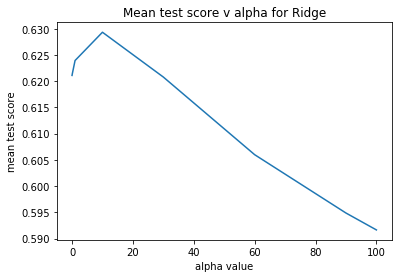

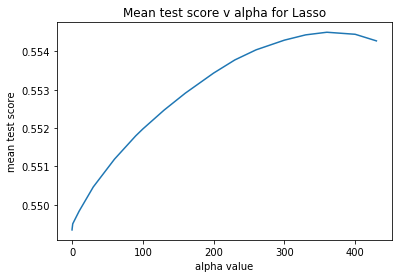

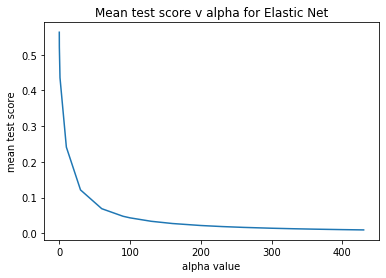

In [30]:
plt.plot(res_mat1['param_regressor__alpha'], res_mat1['mean_test_score'])
plt.xlabel('alpha value')
plt.ylabel('mean test score')
plt.title('Mean test score v alpha for Ridge')
plt.show()

plt.plot(res_mat2['param_regressor__alpha'], res_mat2['mean_test_score'])
plt.xlabel('alpha value')
plt.ylabel('mean test score')
plt.title('Mean test score v alpha for Lasso')
plt.show()

plt.plot(res_mat3['param_regressor__alpha'], res_mat3['mean_test_score'])
plt.xlabel('alpha value')
plt.ylabel('mean test score')
plt.title('Mean test score v alpha for Elastic Net')
plt.show()

From Each of the plots , we see how the mean_test_score varies according to the picked value of alpha during gridsearch.

## 2.6

Building the 3 new models based on best values fround during the grid search

In [37]:
pipe=Pipeline([('processor', preprocessor2), ('regressor', Ridge(alpha=clf_r.best_params_['regressor__alpha']))])
pipe.fit(X_trainv,y_trainv)
coef_r=pipe.get_params()['regressor'].coef_

In [38]:
pipe=Pipeline([('processor', preprocessor2), ('regressor', Lasso(alpha=clf_l.best_params_['regressor__alpha']))])
pipe.fit(X_trainv,y_trainv)
coef_l=pipe.get_params()['regressor'].coef_

In [39]:
pipe=Pipeline([('processor', preprocessor2), ('regressor', ElasticNet(alpha=clf_e.best_params_['regressor__alpha']))])
pipe.fit(X_trainv,y_trainv)
coef_e=pipe.get_params()['regressor'].coef_

In [40]:
arg_coef_r=np.flip(np.argsort(coef_r))[:20]
arg_coef_l=np.flip(np.argsort(coef_l))[:20]
arg_coef_e=np.flip(np.argsort(coef_e))[:20]

output_coef_r=[coef_r[i] for i in arg_coef_r]
output_coef_l=[coef_l[i] for i in arg_coef_l]
output_coef_e=[coef_e[i] for i in arg_coef_e]



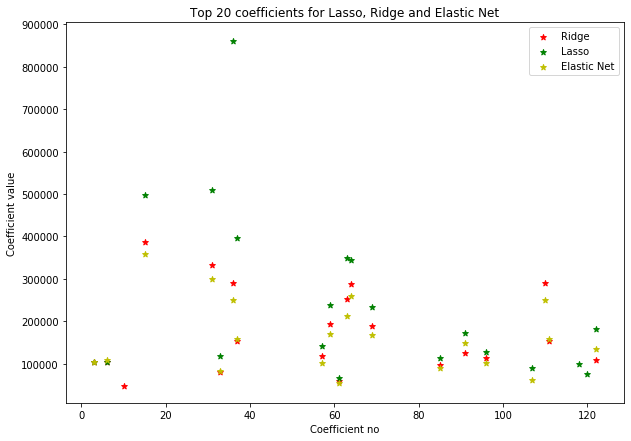

In [41]:
plt.figure(figsize=(10,7))

plt.scatter(arg_coef_r,output_coef_r, marker="*", c="r", label='Ridge')
plt.scatter( arg_coef_l, output_coef_l,marker="*", c="g", label='Lasso')
plt.scatter( arg_coef_e, output_coef_e, marker="*", c="y", label='Elastic Net')
plt.xlabel('Coefficient no')
plt.ylabel('Coefficient value')
plt.title('Top 20 coefficients for Lasso, Ridge and Elastic Net')
plt.legend()
plt.show()

In [42]:
print(np.sort(arg_coef_r))
print(np.sort(arg_coef_l))
print(np.sort(arg_coef_e))

[  3   6  10  15  31  33  36  37  57  59  61  63  64  69  85  91  96 110
 111 122]
[  3   6  15  31  33  36  37  57  59  61  63  64  69  85  91  96 107 118
 120 122]
[  3   6  15  31  33  36  37  57  59  61  63  64  69  85  91  96 107 110
 111 122]


We observe that there are a lot of points located vertically on top of each other. So we can say that almost same features are selected by Ridge, Lasso, and Elastic Net.
The coefficient values are quite comparable to the output price value, this shows there not very high weightage on each of these features.